<a href="https://colab.research.google.com/github/Zomma2/Classfication-and-face-detection/blob/master/PatternImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
import cv2 
import os
import numpy as np 


In [0]:
CATEGORIES = ['Adele','Pogba','Steve jobs']
DATADIR = '/content/gdrive/My Drive/New_photos'


In [0]:
def recieve_data_set (Dataset ,Data_label ):
  for category in CATEGORIES :
    path = os.path.join(DATADIR , category)
    class_num =CATEGORIES.index(category)
    for img in os.listdir(path):
      IMG = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      resized_IMG = cv2.resize(IMG , (100,100))
      Dataset.append([resized_IMG ,class_num ])
      Data_label.append(class_num)

In [0]:
Dataset = []
Data_label = []
recieve_data_set(Dataset , Data_label)


In [290]:
Dataset

[[array([[124, 124, 122, ..., 118, 119, 119],
         [121, 121, 123, ..., 117, 115, 118],
         [124, 124, 121, ..., 119, 114, 116],
         ...,
         [ 45,  66, 151, ...,  54,  50,  46],
         [ 54,  65,  56, ...,  45,  55,  43],
         [ 61,  67,  61, ...,  52,  54, 126]], dtype=uint8), 0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0],
 [array([[ 48,  48,  48, ...,  42,  43,  42],
         [ 48,  48,  48, ...,  42,  42,  42],
         [ 48,  48,  48, ...,  41,  42,  42],
         ...,
         [ 87,  71, 174, ..., 130,  62, 186],
         [130, 134,  71, ...,  71, 231,  82],
         [192, 235, 200, ..., 156,  79,  48]], dtype=uint8), 0],
 [array([[70, 70, 71, ..., 56, 54, 58],
         [70, 72, 71, ..., 57, 55

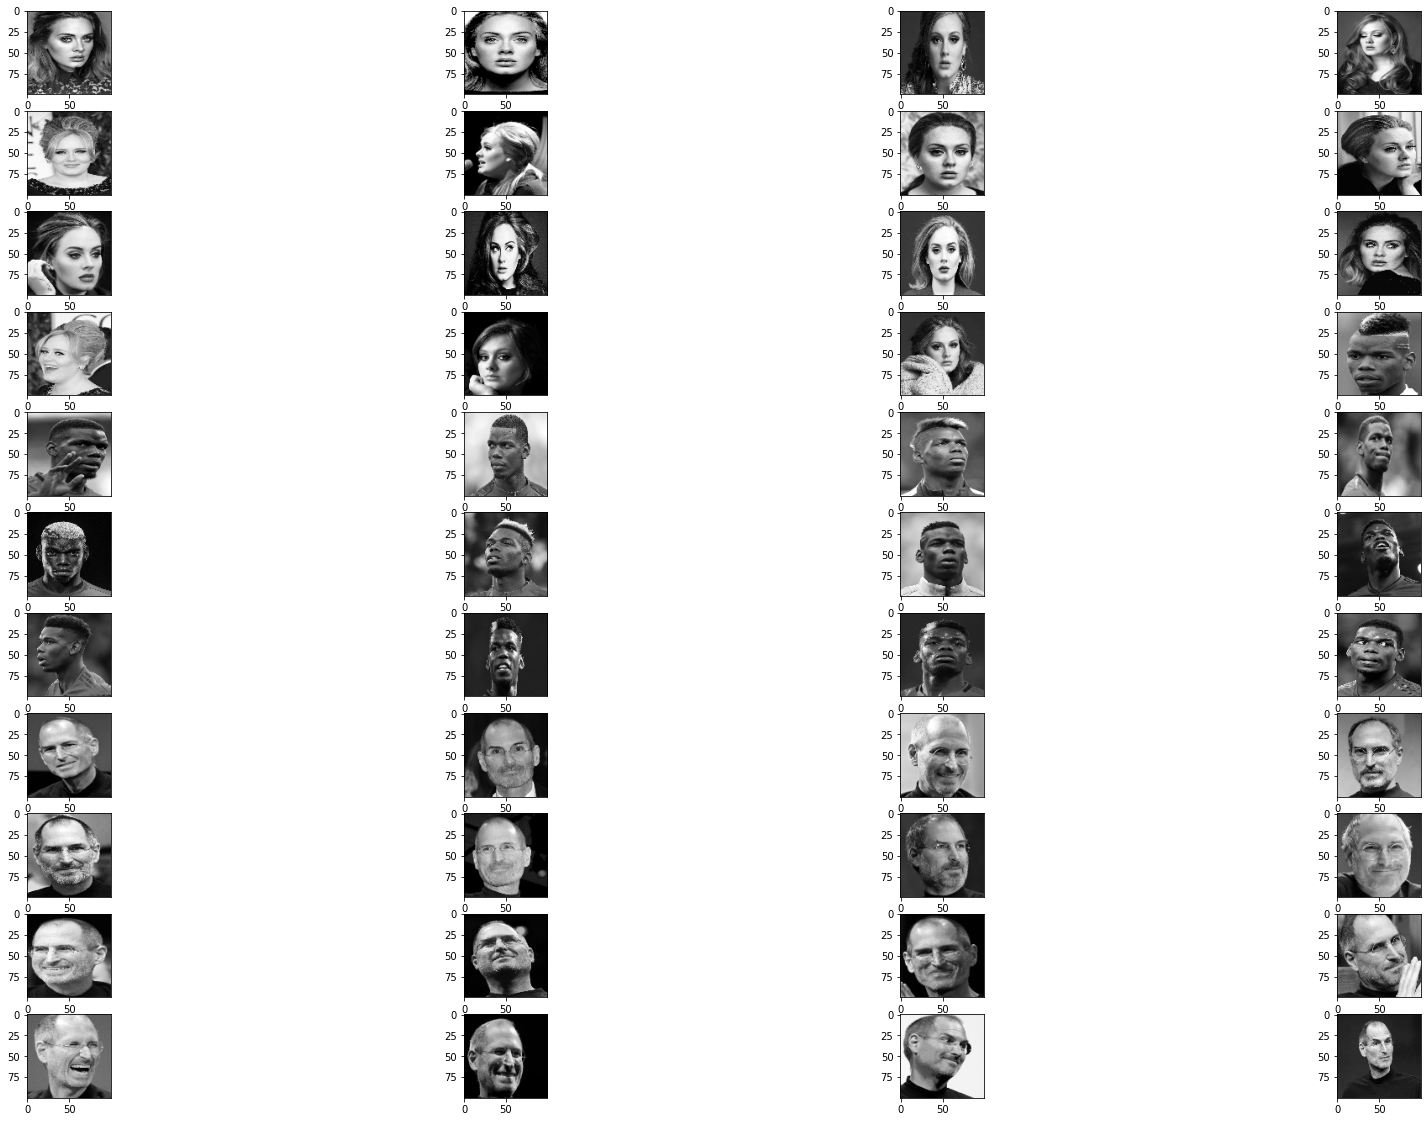

In [291]:
plt.figure(figsize=(30,20)) # specifying the overall grid size

for i in range(44):
    plt.subplot(11,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(Dataset[i][0],cmap = 'gray')

plt.show()
  

In [0]:

def rotate(image, angle=90, scale=1.0):
    '''
    Rotate the image
    :param image: image to be processed
    :param angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
    :param scale: Isotropic scale factor.
    '''
    w = image.shape[1]
    h = image.shape[0]
    #rotate matrix
    M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
    #rotate
    image = cv2.warpAffine(image,M,(w,h))
    return image

def flip(image, vflip=False, hflip=False):
    '''
    Flip the image
    :param image: image to be processed
    :param vflip: whether to flip the image vertically
    :param hflip: whether to flip the image horizontally
    '''
    if hflip or vflip:
        if hflip and vflip:
            c = -1
        else:
            c = 0 if vflip else 1
        image = cv2.flip(image, flipCode=c)
    return image 

In [0]:
i = len(Dataset)
for img in range(i) :
  copy_img = np.array(Dataset[img], copy=True)
  copy_img[0] = rotate(image = copy_img[0])
  Dataset.append(copy_img.copy())
  copy_img = np.array(Dataset[img], copy=True)
  copy_img[0] = rotate(image = copy_img[0] , angle = 20)
  Dataset.append(copy_img.copy())
  copy_img = np.array(Dataset[img], copy=True)
  copy_img[0] = flip(copy_img[0],True)
  Dataset.append(copy_img.copy())
  copy_img = np.array(Dataset[img], copy=True)
  copy_img[0] = flip(copy_img[0],False , True)
  Dataset.append(copy_img.copy())
  copy_img = np.array(Dataset[img], copy=True)
  copy_img[0] = rotate(image = copy_img[0] , angle = 10)
  Dataset.append(copy_img.copy())
  
  
  

In [294]:
len(Dataset)

264

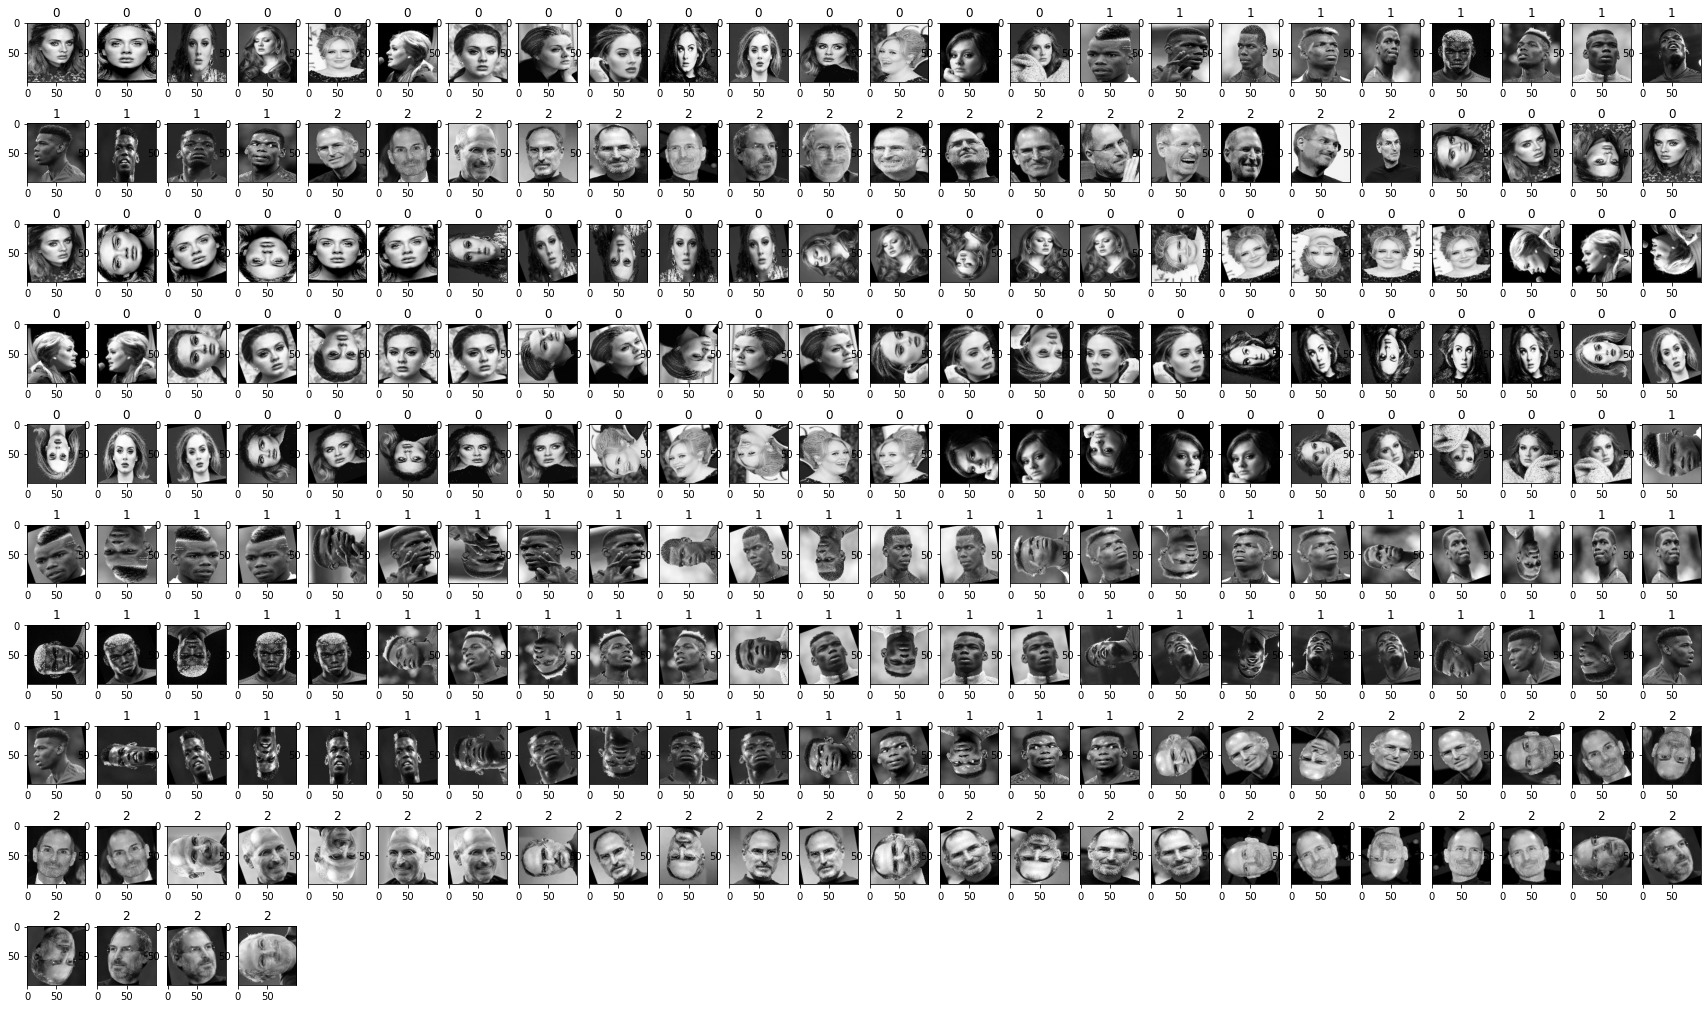

In [295]:
plt.figure(figsize=(30,20)) # specifying the overall grid size

for i in range(220):
    plt.subplot(11,24,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(Dataset[i][0],cmap = 'gray')
    plt.title(Dataset[i][1])

plt.show()
  


In [0]:
X=[]
Y=[]
for i in range(len(Dataset)):
  X.append(Dataset[i][0])
  Y.append(Dataset[i][1])
X=np.array(X)
Y=np.array(Y)


In [0]:
from sklearn.model_selection import train_test_split
x, X_test, y, y_test = train_test_split(X, Y,test_size=0.2,train_size=0.8, shuffle= True )
X_train, X_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75, shuffle= True )


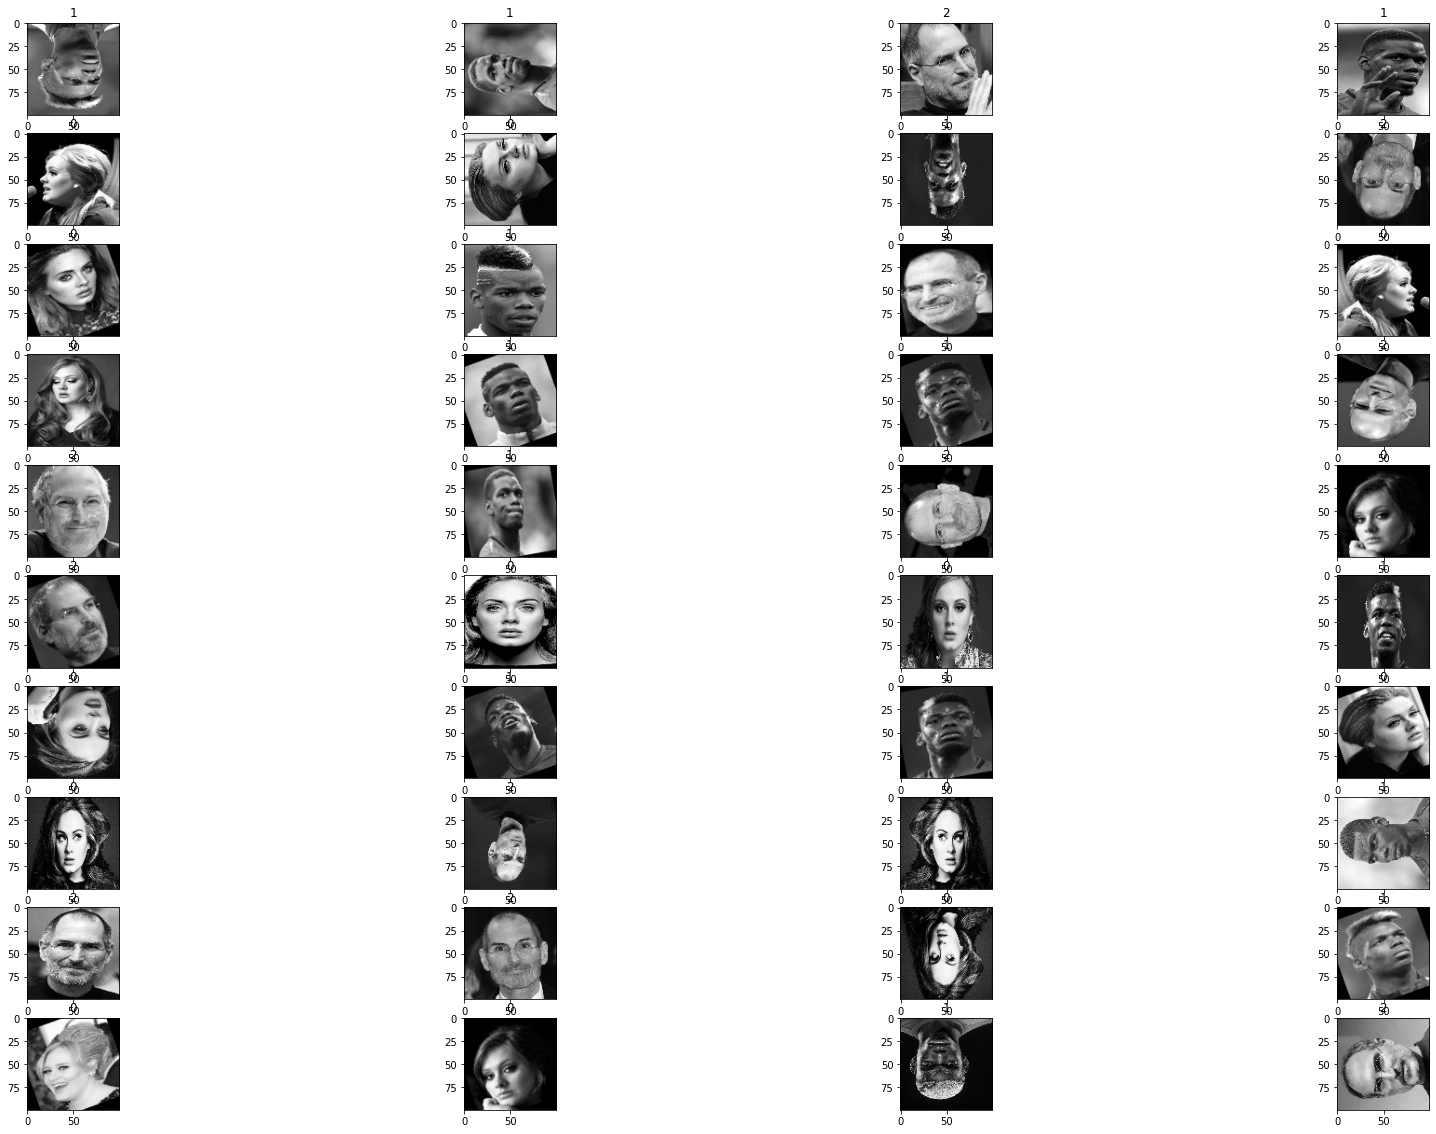

In [298]:
plt.figure(figsize=(30,20)) # specifying the overall grid size

for i in range(40):
    plt.subplot(10,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i],cmap = 'gray')
    plt.title(y_train[i])

plt.show()

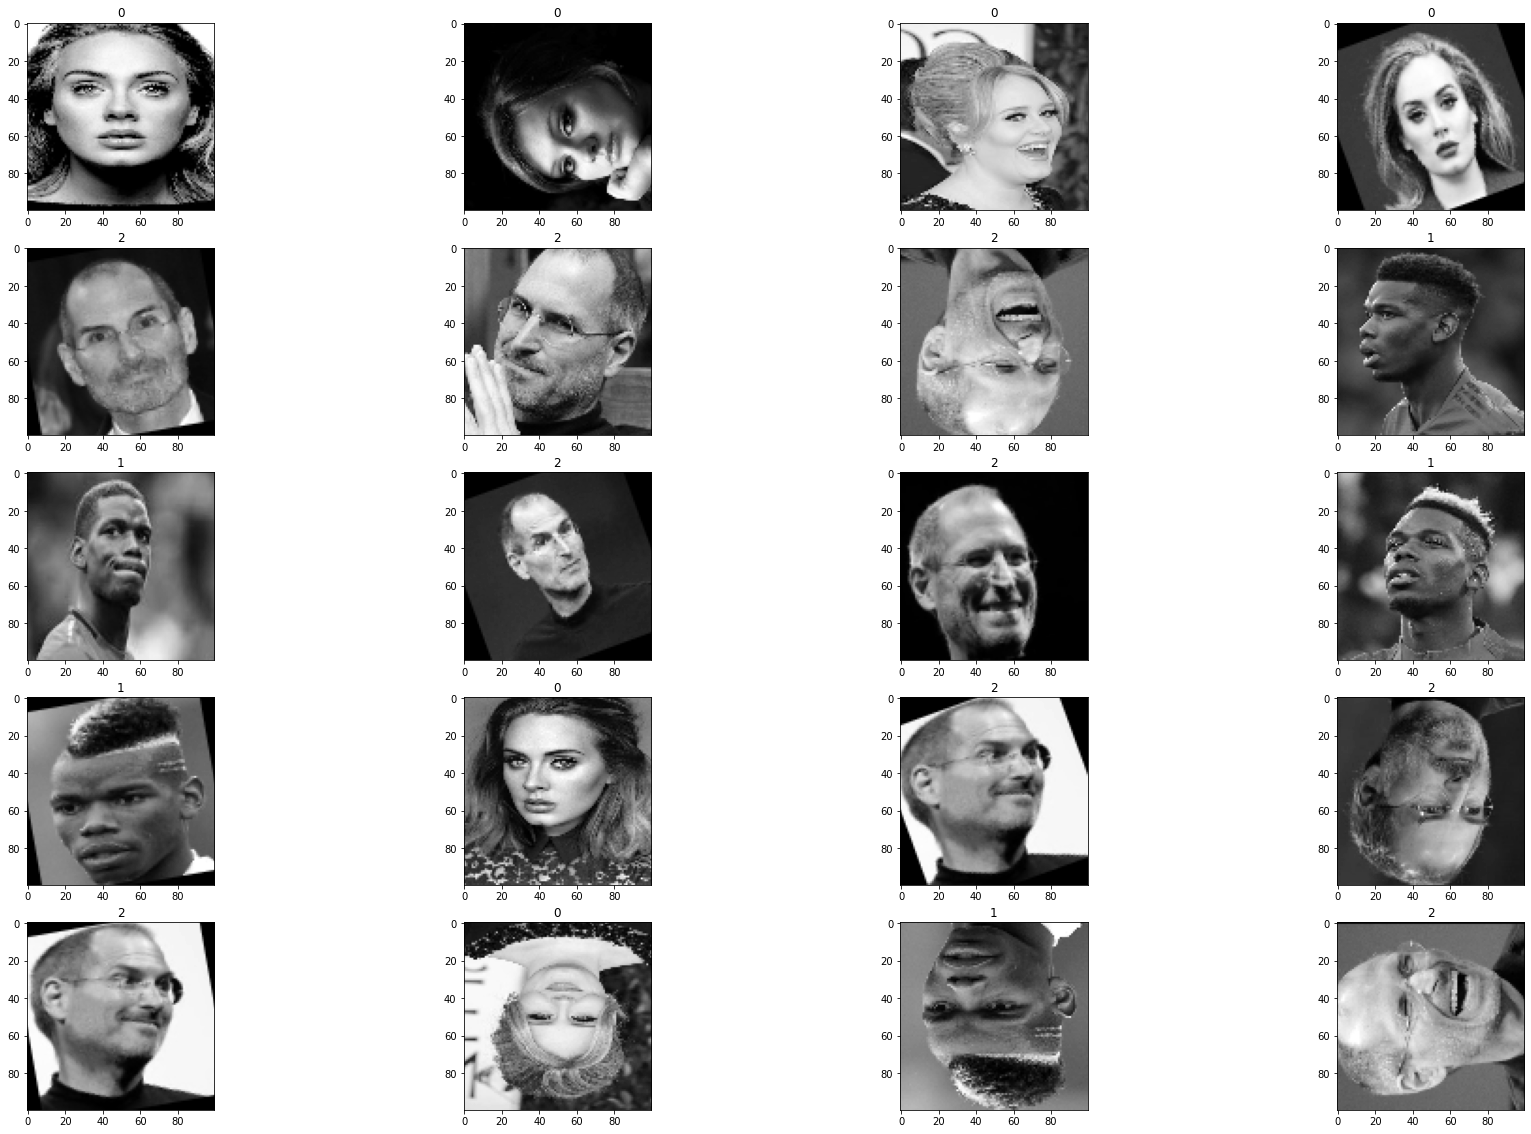

In [299]:
plt.figure(figsize=(30,20)) # specifying the overall grid size

for i in range(20):
    plt.subplot(5,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_test[i],cmap = 'gray')
    plt.title(y_test[i])

plt.show()

In [0]:
from keras.utils import np_utils
X_train = X_train.reshape(y_train.shape[0], 10000)
X_test = X_test.reshape(y_test.shape[0], 10000)
X_cv = X_cv.reshape(y_cv.shape[0] , 10000)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_cv = X_cv.astype('float32')

# normalizing the data to help with the training
X_train /= 255.0
X_test /= 255.0
X_cv /= 255.0

y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_cv = np_utils.to_categorical(y_cv, 3)



In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense,Flatten

In [0]:
model = Sequential()
# hidden layer

model.add(Dense(100, input_shape=(10000,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(3, activation='softmax'))


In [303]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_23 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 8)               

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.01),
	metrics=["accuracy"])

In [305]:
Model_History = model.fit(X_train, y_train, epochs=150, batch_size=30 , verbose = 1,validation_data=(X_cv, y_cv))


Train on 158 samples, validate on 53 samples
Epoch 1/150
158/158 [==============================] - 0s 1ms/step - loss: 1.1320 - accuracy: 0.3481 - val_loss: 1.1637 - val_accuracy: 0.1887
Epoch 2/150
158/158 [==============================] - 0s 336us/step - loss: 1.1063 - accuracy: 0.3671 - val_loss: 1.1190 - val_accuracy: 0.2075
Epoch 3/150
158/158 [==============================] - 0s 313us/step - loss: 1.0890 - accuracy: 0.3861 - val_loss: 1.2140 - val_accuracy: 0.1887
Epoch 4/150
158/158 [==============================] - 0s 317us/step - loss: 1.0603 - accuracy: 0.4114 - val_loss: 1.0824 - val_accuracy: 0.3208
Epoch 5/150
158/158 [==============================] - 0s 314us/step - loss: 1.0557 - accuracy: 0.4430 - val_loss: 1.0712 - val_accuracy: 0.3585
Epoch 6/150
158/158 [==============================] - 0s 322us/step - loss: 1.0764 - accuracy: 0.4304 - val_loss: 1.1008 - val_accuracy: 0.3396
Epoch 7/150
158/158 [==============================] - 0s 316us/step - loss: 1.0471 - a

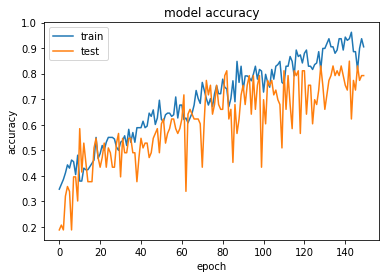

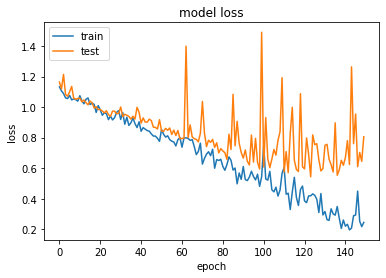

In [306]:
# summarize history for accuracy
plt.plot(Model_History.history['accuracy'])
plt.plot(Model_History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [307]:
results = model.evaluate(X_test, y_test, batch_size=30)
print('test loss, test acc:', results)



53/53 [==============================] - 0s 132us/step
test loss, test acc: [1.0455613316230055, 0.6792452931404114]


In [308]:
PREDICTED_CLASSES = model.predict_classes(X_test, batch_size=30, verbose=1)


53/53 [==============================] - 0s 514us/step


In [0]:
X_test.shape
X_test = X_test.reshape(53,100,100)

(53, 100, 100)


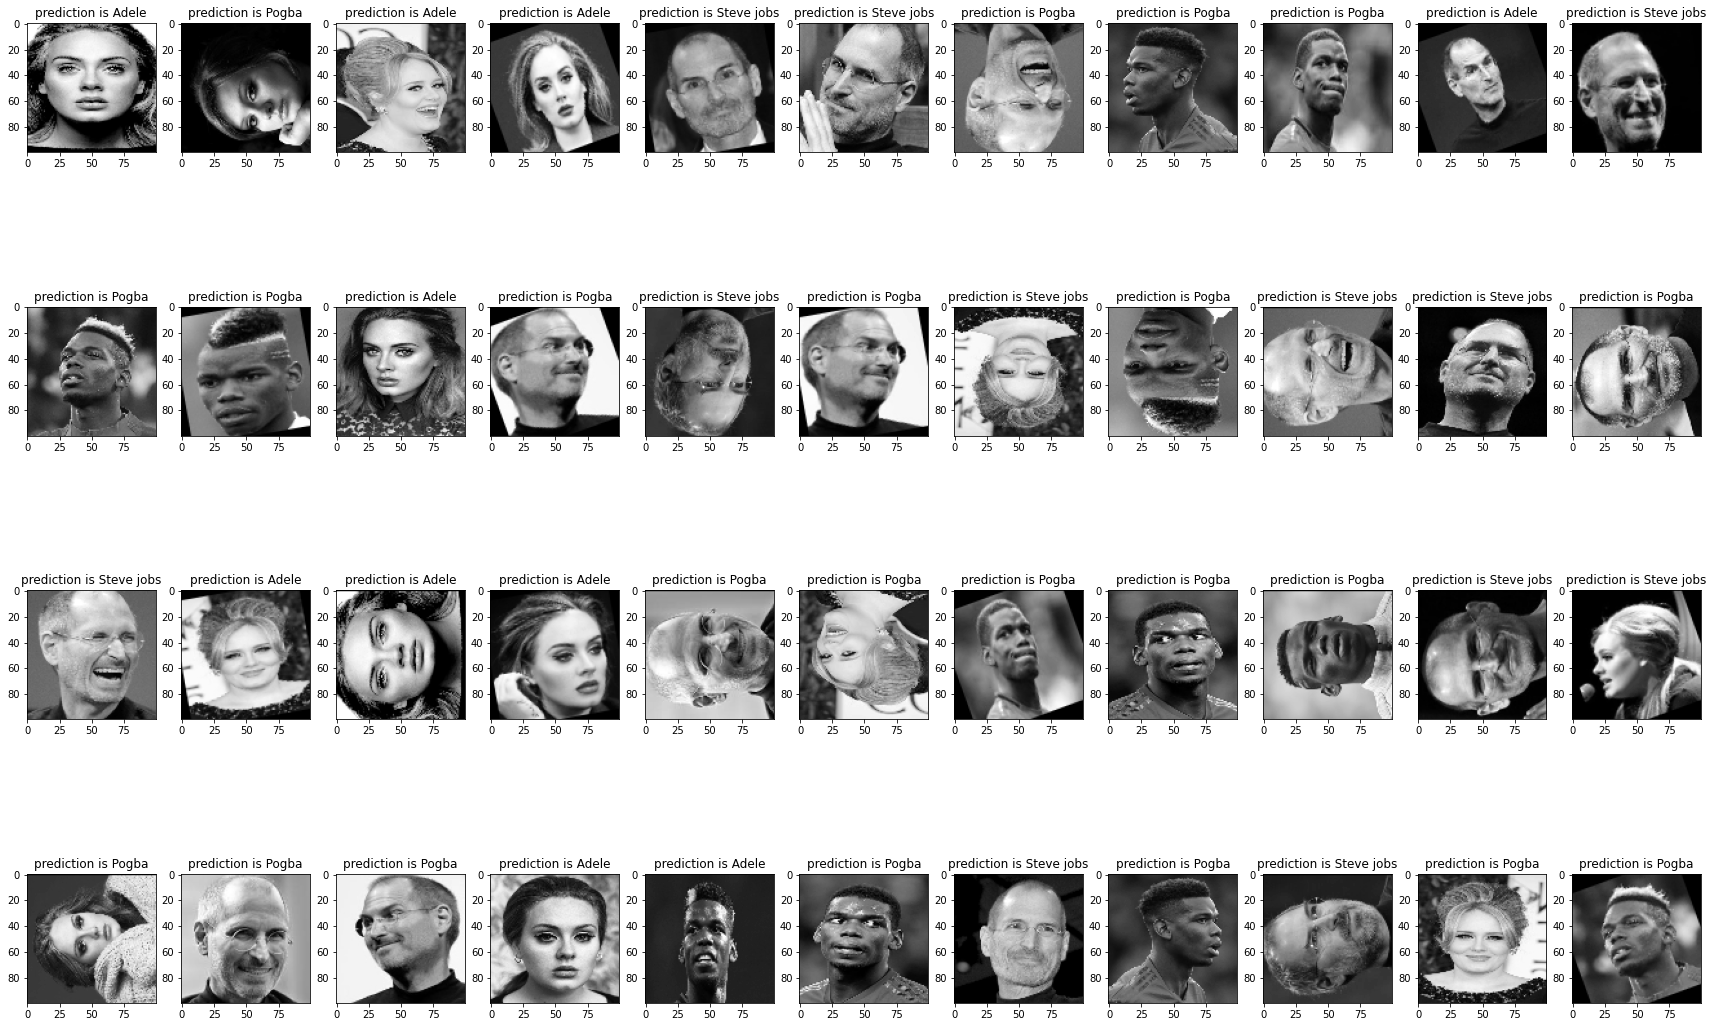

In [311]:
print(X_test.shape)
plt.figure(figsize=(30,20)) # specifying the overall grid size

for i in range(44):
    plt.subplot(4,11,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_test[i],cmap = 'gray')
    plt.title("prediction is {}".format(CATEGORIES[PREDICTED_CLASSES[i]]))

plt.show()